In [1]:
import phasr as phr

In [2]:
phr.__version__

'0.5.4.dev59+ge84d5e2c2.d20260129'

In [3]:
import numpy as np
pi=np.pi
import pandas as pd
import matplotlib.pyplot as plt

# Reference Nucleus and Charge Radius

In [4]:
# Reference nucleus for Al27 (taken from Noel and Hoferichter, 2024)

In [5]:
ai_27Al = [0.03125, 0.05727, 0.02301, -0.01565, -0.0163, -0.0039, 0.0010] 
R_27Al = 8.0 
nuc_ref_27Al = phr.nucleus('Al27_bestfit_example',Z=13,A=27,ai=ai_27Al,R=R_27Al) 

In [6]:
# According reference charge radius (also taken from Noel and Hoferichter, 2024)

In [7]:
r_ch_ref_27Al = 3.063 
dr_ch_ref_27Al = 0.031 
# 
r_ch_sq_ref_27Al = r_ch_ref_27Al**2 
dr_ch_sq_ref_27Al = 2*r_ch_ref_27Al*dr_ch_ref_27Al 
# 
r_ch_sq_ref_27Al, dr_ch_sq_ref_27Al 

(9.381969000000002, 0.18990600000000002)

# Import Datasets

In [8]:
# We use as an example ab-initio calculations for 27Al using the IMSRG over a collection of different input chiral Hamiltonians (courtesy of Matthias Heinz)

In [9]:
AI_dict_27Al = phr.dirac_solvers.post_processing.correlation.prepare_results(Z=13,A=27,folder_path="./IMSRG_27Al/",name='Al27_ab_initio',r_cut=6)

Loaded datasets: ['1p82p0sim7p5', 'NIsample3448', 'EM2p02p0PWA', 'NIsample1173', 'NIsample0606', 'NIsample3472', '1p82p0EM7p5', 'NIsample3480', 'N2LOsat', 'NIsample4117', 'NIsample1802', 'NIsample2007', 'NIsample1141', 'EM2p22p0', 'NIsample0922', 'NIsample3260', 'NIsample3319', 'NIsample0500', 'NIsample3895', 'NIsample2245', 'NIsample0723', 'NIsample3621', 'NIsample1172', 'EM1p82p0', 'NIsample3098', 'NIsample3105', 'NIsample1177', 'EM2p02p0', 'NIsample2460', 'NIsample1469', 'NIsample0750', 'NIsample0090', 'NIsample2411', 'DN2LOGO', 'NIsample2125', 'NIsample3350']
data loaded from  ./tmp/nucleus_splines/charge_density_M0p_Al27_ab_initio_1p82p0sim7p5_x=0.0-6-0.05.txt
data loaded from  ./tmp/nucleus_splines/charge_density_laplace_M0p_Al27_ab_initio_1p82p0sim7p5_x=0.0-6.6000000000000005-0.05.txt
data loaded from  ./tmp/nucleus_splines/charge_density_M0n_Al27_ab_initio_1p82p0sim7p5_x=0.0-6-0.05.txt
data loaded from  ./tmp/nucleus_splines/charge_density_laplace_M0n_Al27_ab_initio_1p82p0sim7p

In [10]:
# You may check for good behaviour of the distributions for large r and at the cutoff r_cut 
# You should choose the cutoff r_cut as large as possible while still reproducing the correct radii and not introducting any unphysical oscillations or behaviour in the high energy 
# If radii are consistent or inconsistent is listed as part of the prints above while the other thing can be checked from the plots

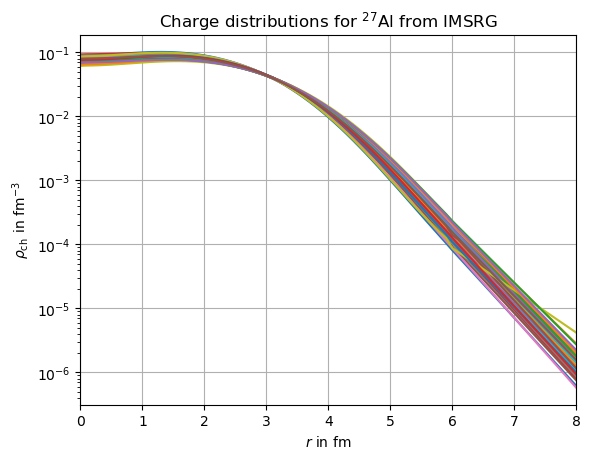

In [11]:
r=np.arange(0,8+0.1,0.1)
for key in AI_dict_27Al:
    key_nucleus = AI_dict_27Al[key]['atom']
    plt.plot(r,key_nucleus.charge_density(r))
plt.title('Charge distributions for $^{27}$Al from IMSRG')
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'$\rho_{\operatorname{ch}}$ in fm$^{-3}$')
plt.grid()
plt.yscale('log')
plt.xlim(0,8)
plt.show()

In [12]:
# You may try to increase r_cut above and see how the high energy behaviour and warnings about radii consistentcy change (you should soon run into problems)

# Collect/Calculate basic quantities for correlation (radii, radii squared)

In [13]:
# The basic function collects/calculates only radii and radii squared, if there are other quantities on file it will also load them

In [14]:
AI_datasets_27Al = phr.dirac_solvers.post_processing.correlation.calculate_correlation_quantities(AI_dict_27Al)

Loaded (existing) correlation quantities for 1p82p0sim7p5 from  ./tmp/correlation_quantities/correlation_quantities_Al27_ab_initio_1p82p0sim7p5.txt :  [np.str_('rch'), np.str_('rchsq'), np.str_('rp'), np.str_('rpsq'), np.str_('rn'), np.str_('rnsq'), np.str_('rw'), np.str_('rwsq'), np.str_('rw-rch'), np.str_('rn-rp'), np.str_('Sp_rhoch_Al27_bestfit_example'), np.str_('Vp_rhoch_Al27_bestfit_example'), np.str_('Sn_rhoch_Al27_bestfit_example'), np.str_('Vn_rhoch_Al27_bestfit_example'), np.str_('Sch_rhoch_Al27_bestfit_example'), np.str_('Vch_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_from_dataset'), np.str_('Sp_rhoch_from_dataset'), np.str_('Vp_rhoch_from_dataset'), np.str_('Sn_rhoch_from_dataset'), np.str_('Vn_rhoch_from_dataset'), np.str_('Sch_rhoch_from_dataset'), np.str_('Vch_rhoch_from_dataset'), np.str_('Fch_q153.524'), np.str_('Fw_q153.524'), np.str_('r4ch'), np.str_('r4p'), np.str_('r4n'), np.

# Correlation Radii

In [15]:
# This is how you can fairly quickly and easily plot a correlation for quantities that are part of the datasets, using the example of radii squared

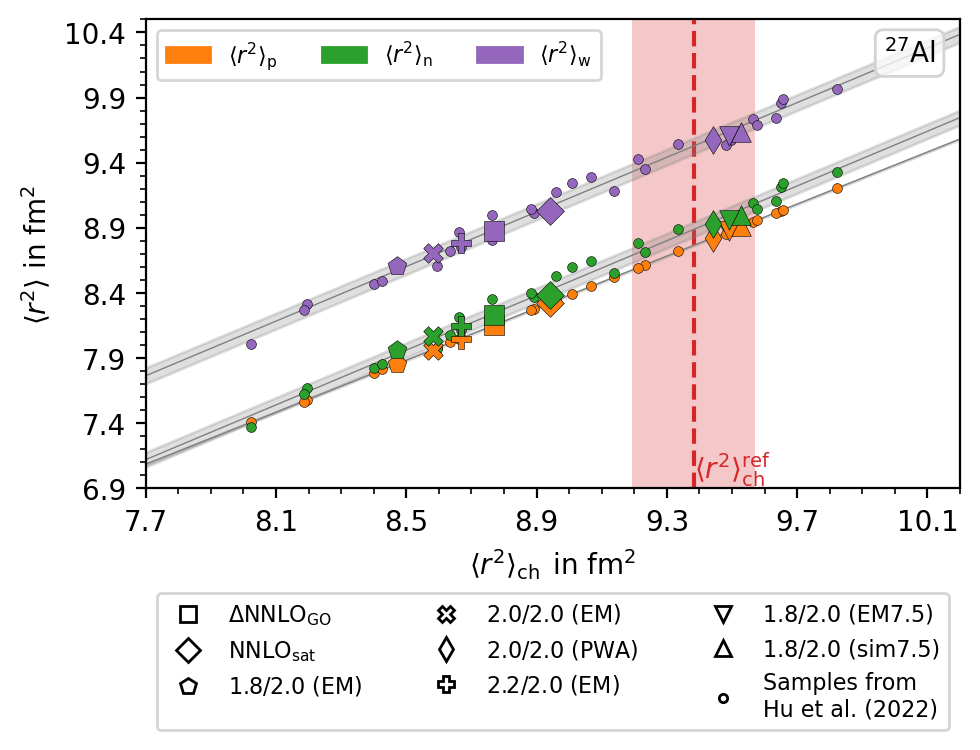

In [16]:
fig,ax = plt.subplots(figsize=(5,4), dpi=200)
phr.dirac_solvers.post_processing.correlation.plot_correlation(ax,AI_datasets_27Al,x_str='rchsq',y_strs=['rpsq','rnsq','rwsq'],x_ref=r_ch_sq_ref_27Al,dx_ref=dr_ch_sq_ref_27Al,x_ref_label=r'$\langle r^2 \rangle^{\operatorname{ref}}_{\operatorname{ch}}$',y_str_label_trans=lambda x: r'$\langle r^2 \rangle_\operatorname{'+x[1]+'}$')
ax.annotate(r'$^{27}$Al', (0.97,0.96) ,xycoords='axes fraction' ,fontsize=10 ,horizontalalignment='right', verticalalignment='top',bbox=dict(boxstyle="round",facecolor=(1,1,1,0.75),edgecolor='lightgray'))
ax.set_ylabel(r'$\langle r^2 \rangle$ in fm$^{2}$')
ax.set_xlabel(r'$\langle r^2 \rangle_{\operatorname{ch}}$ in fm$^{2}$')
plt.tight_layout()
plt.show()

In [17]:
# This is how you then calculate the implied values, propagating all uncertainties (the first parameters here are the same as for the plot)

In [18]:
corr_dict_r2 = phr.dirac_solvers.post_processing.correlation.implications_of_correlation(AI_datasets_27Al,x_str='rchsq',y_strs=['rpsq','rnsq','rwsq'],x_ref=r_ch_sq_ref_27Al,dx_ref=dr_ch_sq_ref_27Al)

rpsq=8.76(19)(0)
rnsq=8.89(20)(6)
rwsq=9.53(20)(6)


In [19]:
# This is a special function for convenience for radii because we are usually interested in radii and not radii squared

In [20]:
corr_dict_sqrsq = phr.dirac_solvers.post_processing.correlation.rsq_dict_add_r_vals(corr_dict_r2)

rch=3.063(31)(0)
rp=2.961(32)(0)
rn=2.981(33)(9)
rw=3.087(32)(10)


In [21]:
# Just as an example, we may also correlate radii instead of radii squared 

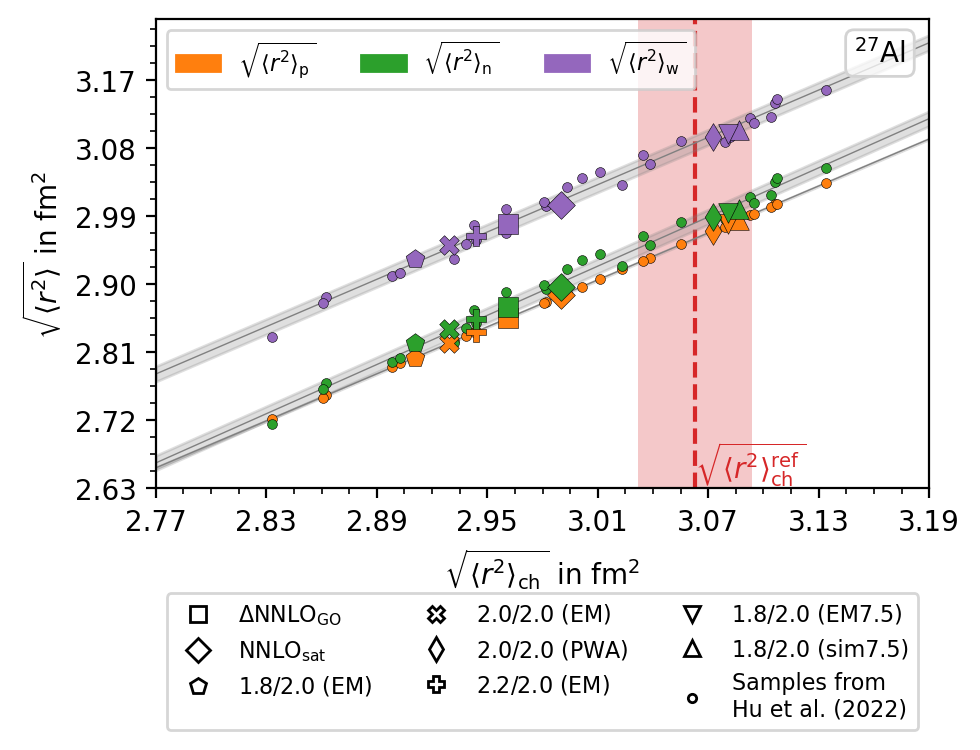

In [22]:
fig,ax = plt.subplots(figsize=(5,4), dpi=200)
phr.dirac_solvers.post_processing.correlation.plot_correlation(ax,AI_datasets_27Al,x_str='rch',y_strs=['rp','rn','rw'],x_ref=r_ch_ref_27Al,dx_ref=dr_ch_ref_27Al,x_ref_label=r'$\sqrt{\langle r^2 \rangle^{\operatorname{ref}}_{\operatorname{ch}}}$',y_str_label_trans=lambda x: r'$\sqrt{\langle r^2 \rangle_\operatorname{'+x[1]+'}}$')
ax.annotate(r'$^{27}$Al', (0.97,0.96) ,xycoords='axes fraction' ,fontsize=10 ,horizontalalignment='right', verticalalignment='top',bbox=dict(boxstyle="round",facecolor=(1,1,1,0.75),edgecolor='lightgray'))
ax.set_ylabel(r'$\sqrt{\langle r^2 \rangle}$ in fm$^{2}$')
ax.set_xlabel(r'$\sqrt{\langle r^2 \rangle_{\operatorname{ch}}}$ in fm$^{2}$')
plt.tight_layout()
plt.show()

In [23]:
# We find the results are very consistent

In [24]:
corr_dict_r = phr.dirac_solvers.post_processing.correlation.implications_of_correlation(AI_datasets_27Al,x_str='rch',y_strs=['rp','rn','rw'],x_ref=r_ch_ref_27Al,dx_ref=dr_ch_ref_27Al)

rp=2.961(32)(0)
rn=2.981(34)(10)
rw=3.087(32)(10)


# Correlation for custom quantities

In [25]:
# You may add the calculation of any quantity to the calculate_correlation_quantities call by adding it via the quantities_fct_dict

In [26]:
# As an example we want to add the r^4 moments of the densities

In [27]:
from scipy.integrate import quad
def r4_ch_moment_example_function(individual_nucleus):
    norm = individual_nucleus.total_charge
    r4 = 4*pi/norm * quad(lambda x: x**2*x**4*individual_nucleus.charge_density(x), 0 , np.inf ,limit=1000)[0]
    return r4
def r4_p_moment_example_function(individual_nucleus):
    norm = individual_nucleus.Z
    r4 = 4*pi/norm * quad(lambda x: x**2*x**4*individual_nucleus.proton_density(x), 0 , np.inf ,limit=1000)[0]
    return r4
def r4_n_moment_example_function(individual_nucleus):
    norm = individual_nucleus.A - individual_nucleus.Z
    r4 = 4*pi/norm * quad(lambda x: x**2*x**4*individual_nucleus.neutron_density(x), 0 , np.inf ,limit=1000)[0]
    return r4
def r4_w_moment_example_function(individual_nucleus):
    norm = individual_nucleus.weak_charge
    r4 = 4*pi/norm * quad(lambda x: x**2*x**4*individual_nucleus.weak_density(x), 0 , np.inf ,limit=1000)[0]
    return r4

# collect all functions in the dictionary, the keys are the names used to identify the quantities (in case you have other parameters/inputs you want them represented in the key)
r4_moments_fct_dict={'r4ch':r4_ch_moment_example_function,'r4p':r4_p_moment_example_function,'r4n':r4_n_moment_example_function,'r4w':r4_w_moment_example_function}

In [28]:
# By adding this dictionary to the call these functions are also all evalualted for all sample nuclei

In [29]:
AI_datasets_27Al = phr.dirac_solvers.post_processing.correlation.calculate_correlation_quantities(AI_dict_27Al,quantities_fct_dict=r4_moments_fct_dict)

Loaded (existing) correlation quantities for 1p82p0sim7p5 from  ./tmp/correlation_quantities/correlation_quantities_Al27_ab_initio_1p82p0sim7p5.txt :  [np.str_('rch'), np.str_('rchsq'), np.str_('rp'), np.str_('rpsq'), np.str_('rn'), np.str_('rnsq'), np.str_('rw'), np.str_('rwsq'), np.str_('rw-rch'), np.str_('rn-rp'), np.str_('Sp_rhoch_Al27_bestfit_example'), np.str_('Vp_rhoch_Al27_bestfit_example'), np.str_('Sn_rhoch_Al27_bestfit_example'), np.str_('Vn_rhoch_Al27_bestfit_example'), np.str_('Sch_rhoch_Al27_bestfit_example'), np.str_('Vch_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_from_dataset'), np.str_('Sp_rhoch_from_dataset'), np.str_('Vp_rhoch_from_dataset'), np.str_('Sn_rhoch_from_dataset'), np.str_('Vn_rhoch_from_dataset'), np.str_('Sch_rhoch_from_dataset'), np.str_('Vch_rhoch_from_dataset'), np.str_('Fch_q153.524'), np.str_('Fw_q153.524'), np.str_('r4ch'), np.str_('r4p'), np.str_('r4n'), np.

In [30]:
# And can be accessed now by the keys of the dictionary 

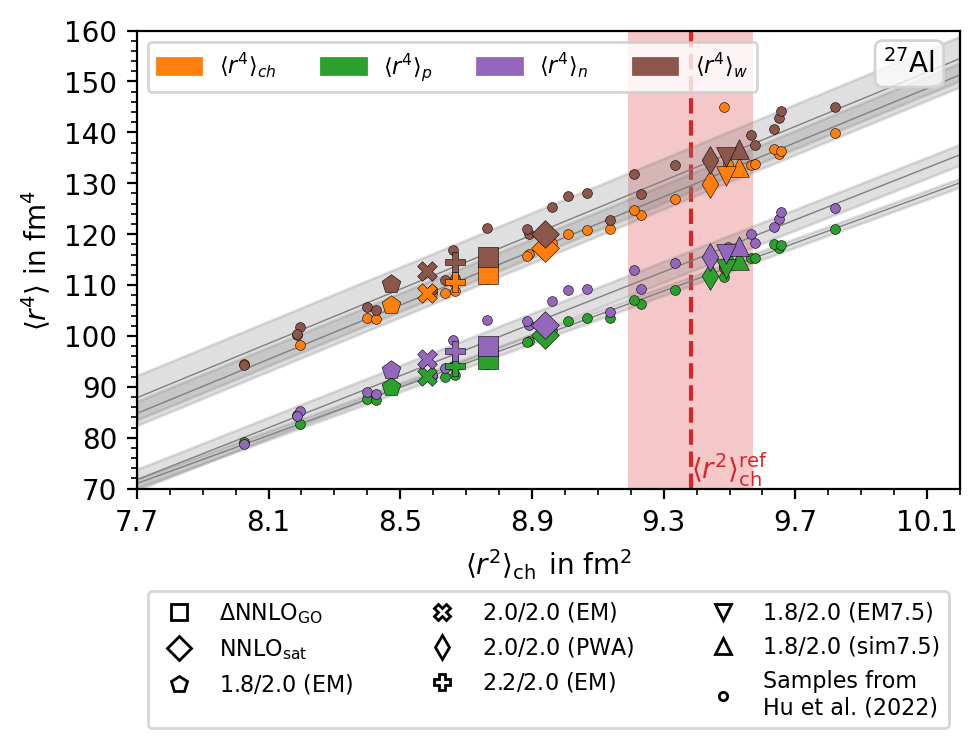

In [31]:
fig,ax = plt.subplots(figsize=(5,4), dpi=200)
phr.dirac_solvers.post_processing.correlation.plot_correlation(ax,AI_datasets_27Al,x_str='rchsq',y_strs=['r4ch','r4p','r4n','r4w'],x_ref=r_ch_sq_ref_27Al,dx_ref=dr_ch_sq_ref_27Al,x_ref_label=r'$\langle r^2 \rangle^{\operatorname{ref}}_{\operatorname{ch}}$',y_str_label_trans=lambda x: r'$\langle r^4 \rangle_{'+x[2:]+'}$')
ax.annotate(r'$^{27}$Al', (0.97,0.96) ,xycoords='axes fraction' ,fontsize=10 ,horizontalalignment='right', verticalalignment='top',bbox=dict(boxstyle="round",facecolor=(1,1,1,0.75),edgecolor='lightgray'))
ax.set_ylabel(r'$\langle r^4 \rangle$ in fm$^{4}$')
ax.set_xlabel(r'$\langle r^2 \rangle_{\operatorname{ch}}$ in fm$^{2}$')
plt.tight_layout()
plt.show()

In [32]:
# We again observe a correlation, which however is a bit weaker than for the radii. The plot shows that the microscopic constraintes from the chiral Hamiltonians seem to change r^2 moments and r^4 moments in a correlated way. 

In [33]:
# We may also predict expected values for the r^4 moments based on this correlation

In [34]:
corr_dict_r = phr.dirac_solvers.post_processing.correlation.implications_of_correlation(AI_datasets_27Al,x_str='rchsq',y_strs=['r4ch','r4p','r4n','r4w'],x_ref=r_ch_sq_ref_27Al,dx_ref=dr_ch_sq_ref_27Al)

r4ch=129.5(51)(24)
r4p=110.8(45)(9)
r4n=114.7(49)(20)
r4w=132.7(51)(44)


In [35]:
# We may calulate the r4 moment also for the reference nucleus and compare to our correlation result for the r^4 moment from the charge distribution
r4_ch_ref = r4_ch_moment_example_function(nuc_ref_27Al) 
r4_ch_ref 

np.float64(134.61777795837497)

In [36]:
# Which is consistent within uncertainty (even without taking the error on r^4 from the reference nucleus into account, which we did not calculate here)

# Correlation for implemented Quantities

In [37]:
# For some (more or less common) quantities we have implemented functions to simplify the process of calculating these for all samples

## Leading Overlap Integrals in $\mu \to e$ conversion

In [38]:
# Correlation with fixed charge distribution for the solutions of the muon and electron wave functions

In [39]:
AI_datasets_27Al = phr.dirac_solvers.post_processing.correlation.calculate_correlation_SI_overlap_integrals(AI_datasets_27Al,reference_nucleus=nuc_ref_27Al)

Loaded (existing) correlation quantities for 1p82p0sim7p5 from  ./tmp/correlation_quantities/correlation_quantities_Al27_ab_initio_1p82p0sim7p5.txt :  [np.str_('rch'), np.str_('rchsq'), np.str_('rp'), np.str_('rpsq'), np.str_('rn'), np.str_('rnsq'), np.str_('rw'), np.str_('rwsq'), np.str_('rw-rch'), np.str_('rn-rp'), np.str_('Sp_rhoch_Al27_bestfit_example'), np.str_('Vp_rhoch_Al27_bestfit_example'), np.str_('Sn_rhoch_Al27_bestfit_example'), np.str_('Vn_rhoch_Al27_bestfit_example'), np.str_('Sch_rhoch_Al27_bestfit_example'), np.str_('Vch_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_from_dataset'), np.str_('Sp_rhoch_from_dataset'), np.str_('Vp_rhoch_from_dataset'), np.str_('Sn_rhoch_from_dataset'), np.str_('Vn_rhoch_from_dataset'), np.str_('Sch_rhoch_from_dataset'), np.str_('Vch_rhoch_from_dataset'), np.str_('Fch_q153.524'), np.str_('Fw_q153.524'), np.str_('r4ch'), np.str_('r4p'), np.str_('r4n'), np.

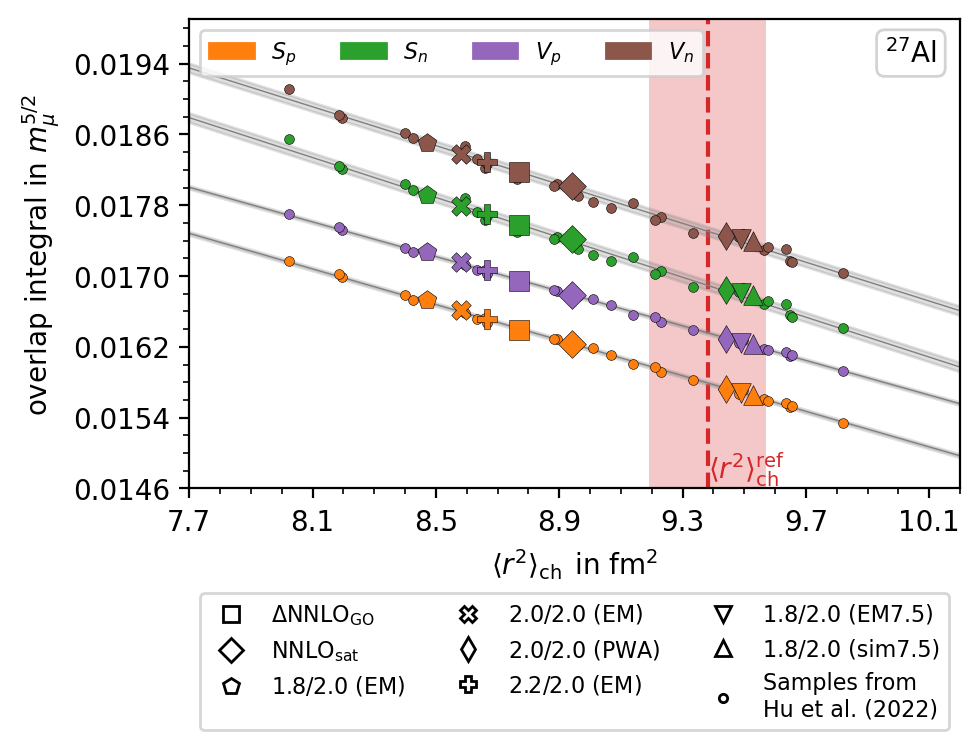

In [40]:
fig,ax = plt.subplots(figsize=(5,4), dpi=200)
phr.dirac_solvers.post_processing.correlation.plot_correlation(ax,AI_datasets_27Al,x_str='rchsq',y_strs=['Sp_rhoch_Al27_bestfit_example','Sn_rhoch_Al27_bestfit_example','Vp_rhoch_Al27_bestfit_example','Vn_rhoch_Al27_bestfit_example'],x_ref=r_ch_sq_ref_27Al,dx_ref=dr_ch_sq_ref_27Al,x_ref_label=r'$\langle r^2 \rangle^{\operatorname{ref}}_{\operatorname{ch}}$',y_str_label_trans=lambda x: r'$'+x[0]+'_'+x[1]+'$')
ax.annotate(r'$^{27}$Al', (0.97,0.96) ,xycoords='axes fraction' ,fontsize=10 ,horizontalalignment='right', verticalalignment='top',bbox=dict(boxstyle="round",facecolor=(1,1,1,0.75),edgecolor='lightgray'))
ax.set_ylabel(r'overlap integral in $m_{\mu}^{5/2}$')
ax.set_xlabel(r'$\langle r^2 \rangle_{\operatorname{ch}}$ in fm$^{2}$')
plt.tight_layout()
plt.show()

In [41]:
corr_dict_ov1 = phr.dirac_solvers.post_processing.correlation.implications_of_correlation(AI_datasets_27Al,x_str='rchsq',y_strs=['Sp_rhoch_Al27_bestfit_example','Sn_rhoch_Al27_bestfit_example','Vp_rhoch_Al27_bestfit_example','Vn_rhoch_Al27_bestfit_example'],x_ref=r_ch_sq_ref_27Al,dx_ref=dr_ch_sq_ref_27Al)

Sp_rhoch_Al27_bestfit_example=0.01579(19)(2)
Sn_rhoch_Al27_bestfit_example=0.01689(21)(5)
Vp_rhoch_Al27_bestfit_example=0.01636(19)(2)
Vn_rhoch_Al27_bestfit_example=0.01751(21)(5)


In [42]:
# Correlation with the charge distribution constructed from the ab initio calculation also for the solutions of the muon and electron wave functions

In [43]:
AI_datasets_27Al = phr.dirac_solvers.post_processing.correlation.calculate_correlation_SI_overlap_integrals(AI_datasets_27Al)

Loaded (existing) correlation quantities for 1p82p0sim7p5 from  ./tmp/correlation_quantities/correlation_quantities_Al27_ab_initio_1p82p0sim7p5.txt :  [np.str_('rch'), np.str_('rchsq'), np.str_('rp'), np.str_('rpsq'), np.str_('rn'), np.str_('rnsq'), np.str_('rw'), np.str_('rwsq'), np.str_('rw-rch'), np.str_('rn-rp'), np.str_('Sp_rhoch_Al27_bestfit_example'), np.str_('Vp_rhoch_Al27_bestfit_example'), np.str_('Sn_rhoch_Al27_bestfit_example'), np.str_('Vn_rhoch_Al27_bestfit_example'), np.str_('Sch_rhoch_Al27_bestfit_example'), np.str_('Vch_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_from_dataset'), np.str_('Sp_rhoch_from_dataset'), np.str_('Vp_rhoch_from_dataset'), np.str_('Sn_rhoch_from_dataset'), np.str_('Vn_rhoch_from_dataset'), np.str_('Sch_rhoch_from_dataset'), np.str_('Vch_rhoch_from_dataset'), np.str_('Fch_q153.524'), np.str_('Fw_q153.524'), np.str_('r4ch'), np.str_('r4p'), np.str_('r4n'), np.

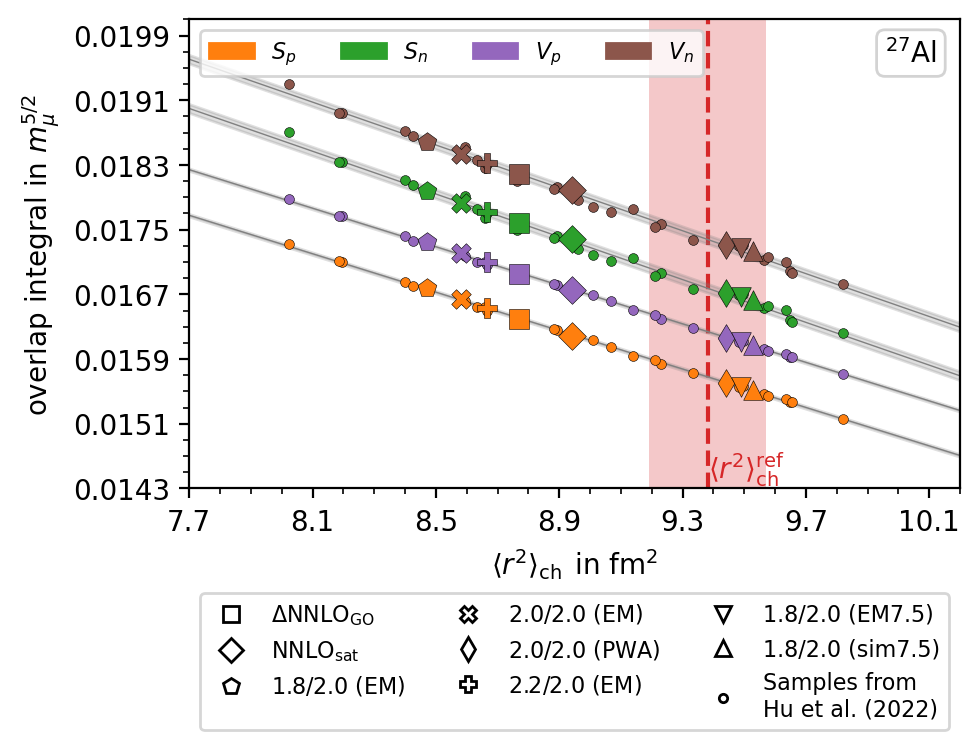

In [44]:
fig,ax = plt.subplots(figsize=(5,4), dpi=200)
phr.dirac_solvers.post_processing.correlation.plot_correlation(ax,AI_datasets_27Al,x_str='rchsq',y_strs=['Sp_rhoch_from_dataset','Sn_rhoch_from_dataset','Vp_rhoch_from_dataset','Vn_rhoch_from_dataset'],x_ref=r_ch_sq_ref_27Al,dx_ref=dr_ch_sq_ref_27Al,x_ref_label=r'$\langle r^2 \rangle^{\operatorname{ref}}_{\operatorname{ch}}$',y_str_label_trans=lambda x: r'$'+x[0]+'_'+x[1]+'$')
ax.annotate(r'$^{27}$Al', (0.97,0.96) ,xycoords='axes fraction' ,fontsize=10 ,horizontalalignment='right', verticalalignment='top',bbox=dict(boxstyle="round",facecolor=(1,1,1,0.75),edgecolor='lightgray'))
ax.set_ylabel(r'overlap integral in $m_{\mu}^{5/2}$')
ax.set_xlabel(r'$\langle r^2 \rangle_{\operatorname{ch}}$ in fm$^{2}$')
plt.tight_layout()
plt.show()

In [45]:
corr_dict_ov1 = phr.dirac_solvers.post_processing.correlation.implications_of_correlation(AI_datasets_27Al,x_str='rchsq',y_strs=['Sp_rhoch_from_dataset','Sn_rhoch_from_dataset','Vp_rhoch_from_dataset','Vn_rhoch_from_dataset'],x_ref=r_ch_sq_ref_27Al,dx_ref=dr_ch_sq_ref_27Al)

Sp_rhoch_from_dataset=0.01568(23)(2)
Sn_rhoch_from_dataset=0.01677(25)(5)
Vp_rhoch_from_dataset=0.01624(23)(1)
Vn_rhoch_from_dataset=0.01738(25)(5)


## Charge and Weak form factor

In [46]:
# Correlation for the form factor evaluated at a specific value of momentum transfer

In [47]:
q_Qweak=0.77802*phr.constants.hc
q_Qweak # MeV

153.524337290808

In [48]:
AI_datasets_27Al = phr.dirac_solvers.post_processing.correlation.calculate_correlation_form_factors(AI_datasets_27Al,q_exp=q_Qweak)

Loaded (existing) correlation quantities for 1p82p0sim7p5 from  ./tmp/correlation_quantities/correlation_quantities_Al27_ab_initio_1p82p0sim7p5.txt :  [np.str_('rch'), np.str_('rchsq'), np.str_('rp'), np.str_('rpsq'), np.str_('rn'), np.str_('rnsq'), np.str_('rw'), np.str_('rwsq'), np.str_('rw-rch'), np.str_('rn-rp'), np.str_('Sp_rhoch_Al27_bestfit_example'), np.str_('Vp_rhoch_Al27_bestfit_example'), np.str_('Sn_rhoch_Al27_bestfit_example'), np.str_('Vn_rhoch_Al27_bestfit_example'), np.str_('Sch_rhoch_Al27_bestfit_example'), np.str_('Vch_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_from_dataset'), np.str_('Sp_rhoch_from_dataset'), np.str_('Vp_rhoch_from_dataset'), np.str_('Sn_rhoch_from_dataset'), np.str_('Vn_rhoch_from_dataset'), np.str_('Sch_rhoch_from_dataset'), np.str_('Vch_rhoch_from_dataset'), np.str_('Fch_q153.524'), np.str_('Fw_q153.524'), np.str_('r4ch'), np.str_('r4p'), np.str_('r4n'), np.

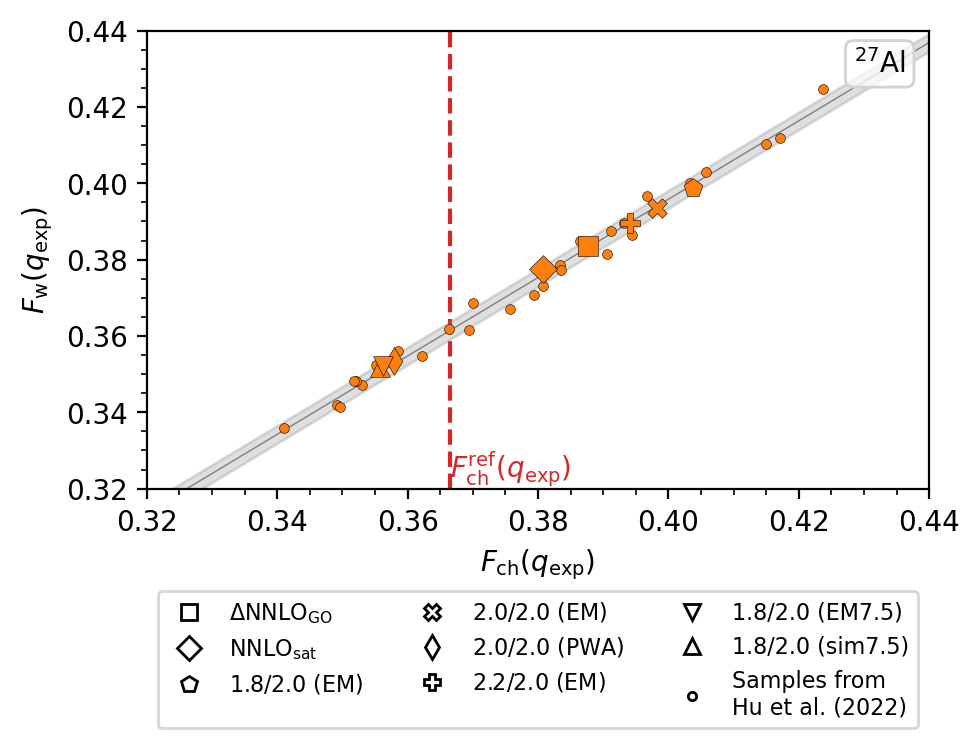

In [49]:
fig,ax = plt.subplots(figsize=(5,4), dpi=200)
phr.dirac_solvers.post_processing.correlation.plot_correlation(ax,AI_datasets_27Al,x_str='Fch_q153.524',y_strs=['Fw_q153.524'],x_ref=nuc_ref_27Al.form_factor(q_Qweak),x_ref_label=r'$F^\operatorname{ref}_\operatorname{ch}(q_\operatorname{exp})$',y_str_label_trans=lambda x: r'$'+x[0]+'_'+x[1]+'$',plot_color_legend=False)
ax.annotate(r'$^{27}$Al', (0.97,0.96) ,xycoords='axes fraction' ,fontsize=10 ,horizontalalignment='right', verticalalignment='top',bbox=dict(boxstyle="round",facecolor=(1,1,1,0.75),edgecolor='lightgray'))
ax.set_ylabel(r'$F_\operatorname{w}(q_\operatorname{exp})$')
ax.set_xlabel(r'$F_\operatorname{ch}(q_\operatorname{exp})$')
plt.tight_layout()
plt.show()

## Parity Violating Asymmetry in elastic electron scattering

In [50]:
# Correlation for the parity violating asymmetry / left right asymmetry of elastic electron nucleus scattering 

In [51]:
# Considered kinematics

In [52]:
E_beam_Qweak = 1157 
angle_Qweak = 7.61 * pi/180 

In [53]:
# One may either pass a fixed energy and angle (as in the example herer) or a fixed energy, and an angle range and according (unnormalized) acceptances. In the second case the result is averaged over the angles and the acceptance with the equation as quoted in the literature (see e.g. sub. material in CREX & PREX)

In [54]:
AI_datasets_27Al = phr.dirac_solvers.post_processing.correlation.calculate_correlation_left_right_asymmetry(AI_datasets_27Al,E_exp=E_beam_Qweak,theta_exp=angle_Qweak,left_right_asymmetry_args={'save_and_load_phase_shifts': True})

Loaded (existing) correlation quantities for 1p82p0sim7p5 from  ./tmp/correlation_quantities/correlation_quantities_Al27_ab_initio_1p82p0sim7p5.txt :  [np.str_('rch'), np.str_('rchsq'), np.str_('rp'), np.str_('rpsq'), np.str_('rn'), np.str_('rnsq'), np.str_('rw'), np.str_('rwsq'), np.str_('rw-rch'), np.str_('rn-rp'), np.str_('Sp_rhoch_Al27_bestfit_example'), np.str_('Vp_rhoch_Al27_bestfit_example'), np.str_('Sn_rhoch_Al27_bestfit_example'), np.str_('Vn_rhoch_Al27_bestfit_example'), np.str_('Sch_rhoch_Al27_bestfit_example'), np.str_('Vch_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_from_dataset'), np.str_('Sp_rhoch_from_dataset'), np.str_('Vp_rhoch_from_dataset'), np.str_('Sn_rhoch_from_dataset'), np.str_('Vn_rhoch_from_dataset'), np.str_('Sch_rhoch_from_dataset'), np.str_('Vch_rhoch_from_dataset'), np.str_('Fch_q153.524'), np.str_('Fw_q153.524'), np.str_('r4ch'), np.str_('r4p'), np.str_('r4n'), np.

In [55]:
AI_datasets_27Al = phr.dirac_solvers.post_processing.correlation.calculate_correlation_left_right_asymmetry(AI_datasets_27Al,reference_nucleus=nuc_ref_27Al,E_exp=E_beam_Qweak,theta_exp=angle_Qweak,left_right_asymmetry_args={'save_and_load_phase_shifts': True})

Loaded (existing) correlation quantities for 1p82p0sim7p5 from  ./tmp/correlation_quantities/correlation_quantities_Al27_ab_initio_1p82p0sim7p5.txt :  [np.str_('rch'), np.str_('rchsq'), np.str_('rp'), np.str_('rpsq'), np.str_('rn'), np.str_('rnsq'), np.str_('rw'), np.str_('rwsq'), np.str_('rw-rch'), np.str_('rn-rp'), np.str_('Sp_rhoch_Al27_bestfit_example'), np.str_('Vp_rhoch_Al27_bestfit_example'), np.str_('Sn_rhoch_Al27_bestfit_example'), np.str_('Vn_rhoch_Al27_bestfit_example'), np.str_('Sch_rhoch_Al27_bestfit_example'), np.str_('Vch_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_Al27_bestfit_example'), np.str_('APV_E1157.00_theta0.1328_rhoch_from_dataset'), np.str_('Sp_rhoch_from_dataset'), np.str_('Vp_rhoch_from_dataset'), np.str_('Sn_rhoch_from_dataset'), np.str_('Vn_rhoch_from_dataset'), np.str_('Sch_rhoch_from_dataset'), np.str_('Vch_rhoch_from_dataset'), np.str_('Fch_q153.524'), np.str_('Fw_q153.524'), np.str_('r4ch'), np.str_('r4p'), np.str_('r4n'), np.

In [56]:
# Experimental results from the Qweak collaboration as comparison
APV_exp=2.16*1e-6
dAPV_exp=np.sqrt(0.11**2+0.16**2)*1e-6

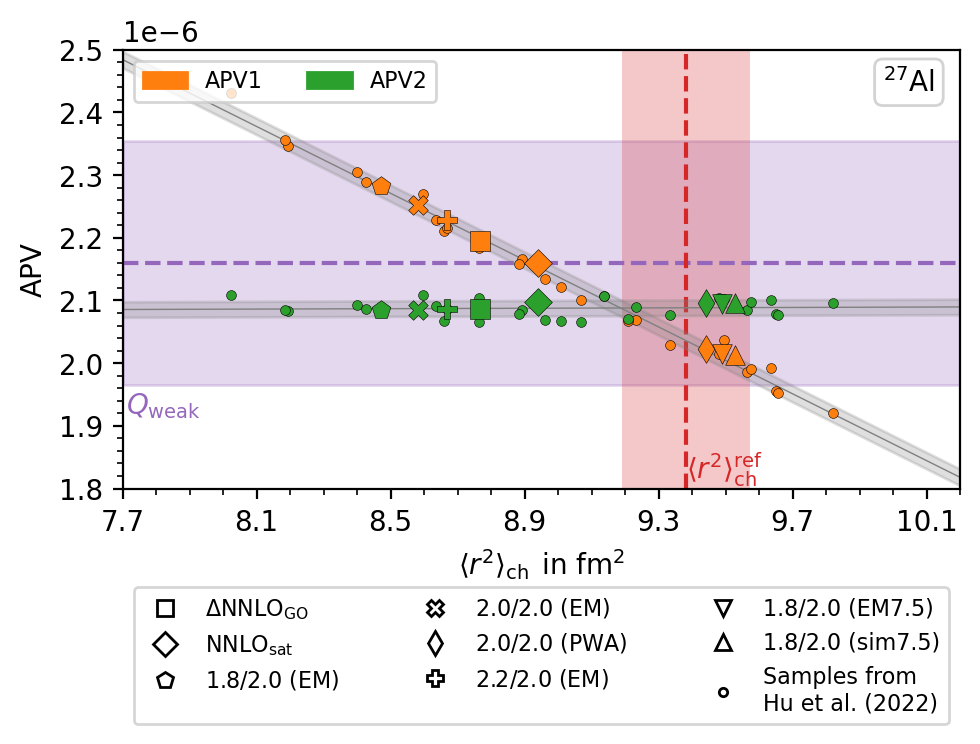

In [57]:
fig,ax = plt.subplots(figsize=(5,4), dpi=200)
phr.dirac_solvers.post_processing.correlation.plot_correlation(ax,AI_datasets_27Al,x_str='rchsq',y_strs=['APV_E1157.00_theta0.1328_rhoch_Al27_bestfit_example','APV_E1157.00_theta0.1328_rhoch_from_dataset'],x_ref=r_ch_sq_ref_27Al,dx_ref=dr_ch_sq_ref_27Al,
                                                               x_ref_label=r'$\langle r^2 \rangle^{\operatorname{ref}}_{\operatorname{ch}}$',y_str_label_trans=lambda x: x[:3]+('2' if x[-12:]=='from_dataset' else '1'))
ax.annotate(r'$^{27}$Al', (0.97,0.96) ,xycoords='axes fraction' ,fontsize=10 ,horizontalalignment='right', verticalalignment='top',bbox=dict(boxstyle="round",facecolor=(1,1,1,0.75),edgecolor='lightgray'))

xmin, xmax = ax.get_xlim()
ax.plot([xmin,xmax],[APV_exp,APV_exp],linestyle='--',color='C4',zorder=-3)
ax.fill_between([xmin,xmax],2*[APV_exp-dAPV_exp],2*[APV_exp+dAPV_exp],alpha=0.25,color='C4',zorder=-4)
ax.annotate(r'$Q_{\operatorname{weak}}$', (xmin+1e-2,APV_exp-1.05*dAPV_exp),horizontalalignment='left', verticalalignment='top',color='C4')

ax.set_ylabel(r'APV')
ax.set_xlabel(r'$\langle r^2 \rangle_{\operatorname{ch}}$ in fm$^{2}$')
plt.tight_layout()
plt.show()

In [58]:
corr_dict_APV = phr.dirac_solvers.post_processing.correlation.implications_of_correlation(AI_datasets_27Al,x_str='rchsq',y_strs=['APV_E1157.00_theta0.1328_rhoch_Al27_bestfit_example','APV_E1157.00_theta0.1328_rhoch_from_dataset'],x_ref=r_ch_sq_ref_27Al,dx_ref=dr_ch_sq_ref_27Al)

APV_E1157.00_theta0.1328_rhoch_Al27_bestfit_example=0.000002036(51)(13)
APV_E1157.00_theta0.1328_rhoch_from_dataset=0.000002088(0)(12)


In [59]:
# Reverse Correlation: Deducing the nucleus skin based on the APV measurement 

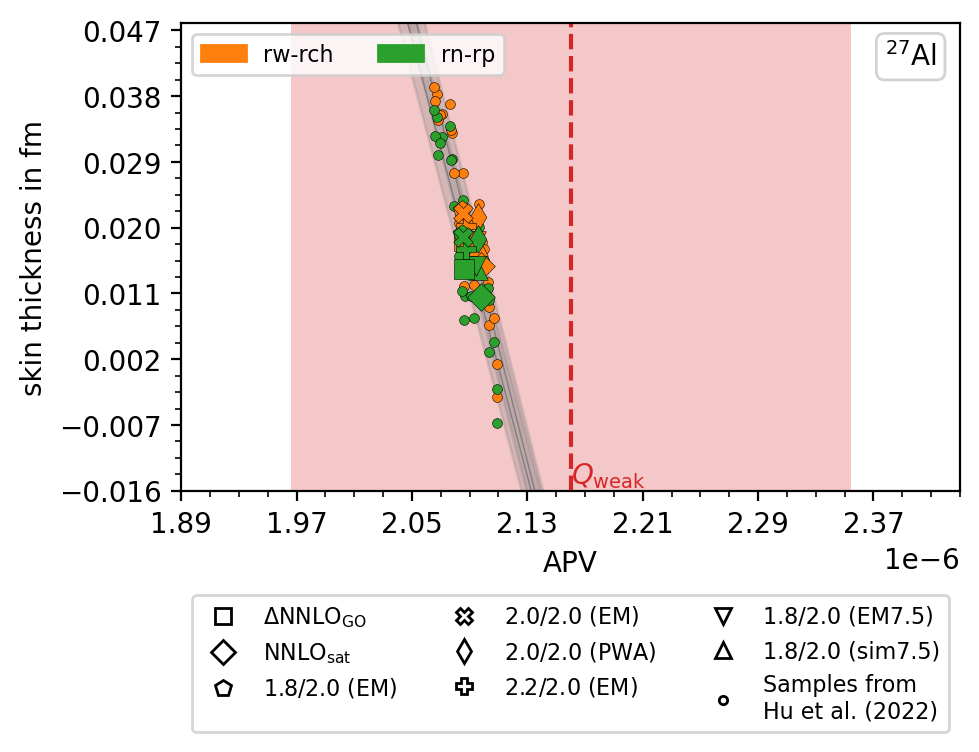

In [60]:
fig,ax = plt.subplots(figsize=(5,4), dpi=200)
phr.dirac_solvers.post_processing.correlation.plot_correlation(ax,AI_datasets_27Al,x_str='APV_E1157.00_theta0.1328_rhoch_from_dataset',y_strs=['rw-rch','rn-rp'],x_ref=APV_exp,dx_ref=dAPV_exp,
                                                               x_ref_label=r'$Q_{\operatorname{weak}}$',y_str_label_trans=lambda x: x)
ax.annotate(r'$^{27}$Al', (0.97,0.96) ,xycoords='axes fraction' ,fontsize=10 ,horizontalalignment='right', verticalalignment='top',bbox=dict(boxstyle="round",facecolor=(1,1,1,0.75),edgecolor='lightgray'))
ax.set_ylabel(r'skin thickness in fm')
ax.set_xlabel(r'APV')
plt.tight_layout()
plt.show()

In [61]:
corr_dict_rskin = phr.dirac_solvers.post_processing.correlation.implications_of_correlation(AI_datasets_27Al,x_str='APV_E1157.00_theta0.1328_rhoch_from_dataset',y_strs=['rw-rch','rn-rp'],x_ref=APV_exp,dx_ref=dAPV_exp)

rw-rch=-0.04(15)(0)
rn-rp=-0.04(14)(0)


In [62]:
# Very large uncertainty due to the large uncertainty on the experimental measurement